# **Setup**

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

from IPython.display import clear_output
from warnings import filterwarnings
filterwarnings('ignore')

## **Set Visualization Style**

In [178]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [179]:
plt.style.use('fivethirtyeight')

# **Data Import**

In [157]:
# Read Webpage
dfs = pd.read_html(Webpage_URL)

print(f'No. of Table Found: {len(dfs)}')

No. of Table Found: 2


In [158]:
# Dataframe 01
dfs[0].head()

,Rank,State or union territory,Population (1951 Census)[11],Population (1961 Census)[11],Population (1971 Census)[11],Population (1981 Census)[11],Population (1991 Census)[11],Population (2001 Census)[11],Population (2011 Census)[11]
0,1,Uttar Pradesh,60274800.0,70144160.0,83849775.0,105113300.0,132062800.0,166053600.0,199581477
1,2,Maharashtra,32002500.0,39554900.0,50412240.0,62782820.0,78937190.0,96752500.0,112372972
2,3,Bihar,29085900.0,34841490.0,42126800.0,52303000.0,64531200.0,82879910.0,103804630
3,4,West Bengal,26300670.0,34926000.0,44312017.0,54580650.0,68077970.0,80221300.0,91347736
4,5,Madhya Pradesh,18615700.0,23218950.0,30017180.0,38169500.0,48566800.0,60385090.0,72597565


In [159]:
# Dataframe 02
dfs[1].head()

,States and union territories of India ordered by
0,Area Population GDP (per capita) Abbreviations...
1,vte


## **Create Dataframe**

In [160]:
df = dfs[0].copy()

print(df.shape)
print(df.columns,'\n')
df.head()

(37, 9)
Index(['Rank', 'State or union territory', 'Population (1951 Census)[11]',
       'Population (1961 Census)[11]', 'Population (1971 Census)[11]',
       'Population (1981 Census)[11]', 'Population (1991 Census)[11]',
       'Population (2001 Census)[11]', 'Population (2011 Census)[11]'],
      dtype='object') 



,Rank,State or union territory,Population (1951 Census)[11],Population (1961 Census)[11],Population (1971 Census)[11],Population (1981 Census)[11],Population (1991 Census)[11],Population (2001 Census)[11],Population (2011 Census)[11]
0,1,Uttar Pradesh,60274800.0,70144160.0,83849775.0,105113300.0,132062800.0,166053600.0,199581477
1,2,Maharashtra,32002500.0,39554900.0,50412240.0,62782820.0,78937190.0,96752500.0,112372972
2,3,Bihar,29085900.0,34841490.0,42126800.0,52303000.0,64531200.0,82879910.0,103804630
3,4,West Bengal,26300670.0,34926000.0,44312017.0,54580650.0,68077970.0,80221300.0,91347736
4,5,Madhya Pradesh,18615700.0,23218950.0,30017180.0,38169500.0,48566800.0,60385090.0,72597565


## **Rename Cols**

In [161]:
df.drop(['Rank'],axis=1,inplace=True)
df.rename({'State or union territory':'State',
           'Population (1951 Census)[11]':'Pop_1951',
           'Population (1961 Census)[11]':'Pop_1961',
           'Population (1971 Census)[11]':'Pop_1971',
           'Population (1981 Census)[11]':'Pop_1981',
           'Population (1991 Census)[11]':'Pop_1991',
           'Population (2001 Census)[11]':'Pop_2001',
           'Population (2011 Census)[11]':'Pop_2011'},axis=1,inplace=True)

print(df.shape)
df.head()

(37, 8)


,State,Pop_1951,Pop_1961,Pop_1971,Pop_1981,Pop_1991,Pop_2001,Pop_2011
0,Uttar Pradesh,60274800.0,70144160.0,83849775.0,105113300.0,132062800.0,166053600.0,199581477
1,Maharashtra,32002500.0,39554900.0,50412240.0,62782820.0,78937190.0,96752500.0,112372972
2,Bihar,29085900.0,34841490.0,42126800.0,52303000.0,64531200.0,82879910.0,103804630
3,West Bengal,26300670.0,34926000.0,44312017.0,54580650.0,68077970.0,80221300.0,91347736
4,Madhya Pradesh,18615700.0,23218950.0,30017180.0,38169500.0,48566800.0,60385090.0,72597565


## **Check Missing Values**

In [162]:
df.isna().sum()

State       0
Pop_1951    2
Pop_1961    1
Pop_1971    1
Pop_1981    1
Pop_1991    1
Pop_2001    1
Pop_2011    0
dtype: int64

## **Transpose Dataframe**

In [163]:
df = df.T
df.head()

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
State,Uttar Pradesh,Maharashtra,Bihar,West Bengal,Madhya Pradesh,Tamil Nadu,Rajasthan,Karnataka,Gujarat,Andhra Pradesh,...,Mizoram,Sikkim,Delhi,Puducherry,Chandigarh,Andaman and Nicobar Islands,Dadra and Nagar Haveli,Daman and Diu,Lakshadweep,India
Pop_1951,60274800.0,32002500.0,29085900.0,26300670.0,18615700.0,30119680.0,15971130.0,19402500.0,16263700.0,31115000.0,...,196970.0,138093.0,1744500.0,317407.0,24948.0,31480.0,42846.0,49482.0,21000.0,361088400.0
Pop_1961,70144160.0,39554900.0,34841490.0,34926000.0,23218950.0,33687100.0,20156540.0,23587910.0,20633305.0,35983480.0,...,266200.0,162863.0,2659990.0,369355.0,120480.0,64160.0,58020.0,37587.0,24370.0,439235720.0
Pop_1971,83849775.0,50412240.0,42126800.0,44312017.0,30017180.0,41199170.0,25765810.0,29299015.0,26697488.0,43502710.0,...,332190.0,210205.0,4066400.0,472836.0,257100.0,115874.0,74880.0,63000.0,32900.0,548160050.0
Pop_1981,105113300.0,62782820.0,52303000.0,54580650.0,38169500.0,48408080.0,34361860.0,37135710.0,34085800.0,53551030.0,...,494440.0,316840.0,6220973.0,604281.0,452960.0,189496.0,104300.0,79842.0,40250.0,683329900.0


In [164]:
df.columns = df.loc['State',:].values
df.drop('State',inplace=True)
df.head()

,Uttar Pradesh,Maharashtra,Bihar,West Bengal,Madhya Pradesh,Tamil Nadu,Rajasthan,Karnataka,Gujarat,Andhra Pradesh,...,Mizoram,Sikkim,Delhi,Puducherry,Chandigarh,Andaman and Nicobar Islands,Dadra and Nagar Haveli,Daman and Diu,Lakshadweep,India
Pop_1951,60274800.0,32002500.0,29085900.0,26300670.0,18615700.0,30119680.0,15971130.0,19402500.0,16263700.0,31115000.0,...,196970.0,138093.0,1744500.0,317407.0,24948.0,31480.0,42846.0,49482.0,21000.0,361088400.0
Pop_1961,70144160.0,39554900.0,34841490.0,34926000.0,23218950.0,33687100.0,20156540.0,23587910.0,20633305.0,35983480.0,...,266200.0,162863.0,2659990.0,369355.0,120480.0,64160.0,58020.0,37587.0,24370.0,439235720.0
Pop_1971,83849775.0,50412240.0,42126800.0,44312017.0,30017180.0,41199170.0,25765810.0,29299015.0,26697488.0,43502710.0,...,332190.0,210205.0,4066400.0,472836.0,257100.0,115874.0,74880.0,63000.0,32900.0,548160050.0
Pop_1981,105113300.0,62782820.0,52303000.0,54580650.0,38169500.0,48408080.0,34361860.0,37135710.0,34085800.0,53551030.0,...,494440.0,316840.0,6220973.0,604281.0,452960.0,189496.0,104300.0,79842.0,40250.0,683329900.0
Pop_1991,132062800.0,78937190.0,64531200.0,68077970.0,48566800.0,55859300.0,44005990.0,44977200.0,41309580.0,66508170.0,...,690963.0,406000.0,9421311.0,808117.0,642374.0,281990.0,138290.0,102110.0,52820.0,846421830.0


# **Data Cleaning**

In [165]:
df.isna().any(axis=1)

Pop_1951     True
Pop_1961     True
Pop_1971     True
Pop_1981     True
Pop_1991     True
Pop_2001     True
Pop_2011    False
dtype: bool

# **Data Processing**

## **Convert Values To Crores**

In [166]:
df = df/(10**7)
df.head()

,Uttar Pradesh,Maharashtra,Bihar,West Bengal,Madhya Pradesh,Tamil Nadu,Rajasthan,Karnataka,Gujarat,Andhra Pradesh,...,Mizoram,Sikkim,Delhi,Puducherry,Chandigarh,Andaman and Nicobar Islands,Dadra and Nagar Haveli,Daman and Diu,Lakshadweep,India
Pop_1951,6.02748,3.20025,2.90859,2.630067,1.86157,3.011968,1.597113,1.94025,1.62637,3.1115,...,0.019697,0.013809,0.17445,0.031741,0.002495,0.003148,0.004285,0.004948,0.0021,36.10884
Pop_1961,7.014416,3.95549,3.484149,3.4926,2.321895,3.36871,2.015654,2.358791,2.063331,3.598348,...,0.02662,0.016286,0.265999,0.036936,0.012048,0.006416,0.005802,0.003759,0.002437,43.923572
Pop_1971,8.384977,5.041224,4.21268,4.431202,3.001718,4.119917,2.576581,2.929902,2.669749,4.350271,...,0.033219,0.021021,0.40664,0.047284,0.02571,0.011587,0.007488,0.0063,0.00329,54.816005
Pop_1981,10.51133,6.278282,5.2303,5.458065,3.81695,4.840808,3.436186,3.713571,3.40858,5.355103,...,0.049444,0.031684,0.622097,0.060428,0.045296,0.01895,0.01043,0.007984,0.004025,68.33299
Pop_1991,13.20628,7.893719,6.45312,6.807797,4.85668,5.58593,4.400599,4.49772,4.130958,6.650817,...,0.069096,0.0406,0.942131,0.080812,0.064237,0.028199,0.013829,0.010211,0.005282,84.642183


# **Data Exploration**

## **Top 5 States - 1951 Census**

In [194]:
df.iloc[df.index == 'Pop_1951',df.columns!='India'].T.sort_values('Pop_1951',axis=0,ascending=False).head()

,Pop_1951
Uttar Pradesh,6.02748
Maharashtra,3.20025
Andhra Pradesh,3.1115
Tamil Nadu,3.011968
Bihar,2.90859


## **Top 5 States - 2011 Census**

In [207]:
df.loc[:,['Uttar Pradesh','Bihar']].T.sort_values('Pop_2011',axis=0,ascending=False).head()

,Pop_1951,Pop_1961,Pop_1971,Pop_1981,Pop_1991,Pop_2001,Pop_2011
Uttar Pradesh,6.02748,7.014416,8.384977,10.51133,13.20628,16.60536,19.958148
Bihar,2.90859,3.484149,4.21268,5.2303,6.45312,8.287991,10.380463


In [187]:
df.iloc[df.index=='Pop_2011',df.columns!='India'].T.sort_values('Pop_2011',axis=0,ascending=False).head()

,Pop_2011
Uttar Pradesh,19.958148
Maharashtra,11.237297
Bihar,10.380463
West Bengal,9.134774
Madhya Pradesh,7.259756


## **Line Plot**

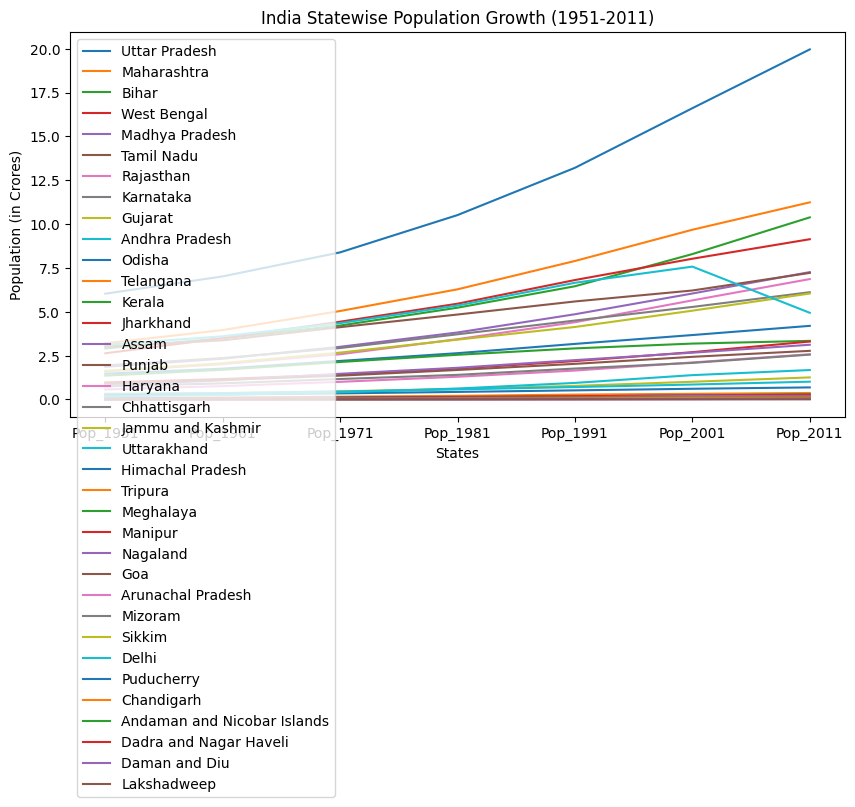

In [175]:
df.iloc[:,df.columns!='India'].plot(kind='line',figsize=(10,5),
        title='India Statewise Population Growth (1951-2011)',
        xlabel= 'States',
        ylabel='Population (in Crores)')
plt.show()